## Pneumonia detection using CNN

### Dataset

The dataset comprises 5,863 JPEG X-Ray images and is categorized into two types (Pneumonia and Normal), organized into three folders: train, test, and val. Each folder contains sub-folders for each image type.

[Dataset Link](https://drive.google.com/file/d/1219EeGE1XTJVXYaulynJSa3BXGsbNCLx/view?usp=sharing)

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import csv
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing

In [2]:
# Define paths to dataset folders
train_dir = 'pneumonia/train'
validation_dir = 'pneumonia/val'
test_dir = 'pneumonia/test'

train_ds = tf.keras.utils.image_dataset_from_directory(train_dir, image_size=(180, 180), batch_size=32)
validation_ds = tf.keras.utils.image_dataset_from_directory(validation_dir, image_size=(180, 180), batch_size=32)
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir, image_size=(180, 180), batch_size=32)

class_names = train_ds.class_names
print(class_names)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
['NORMAL', 'PNEUMONIA']


### Data Visualization

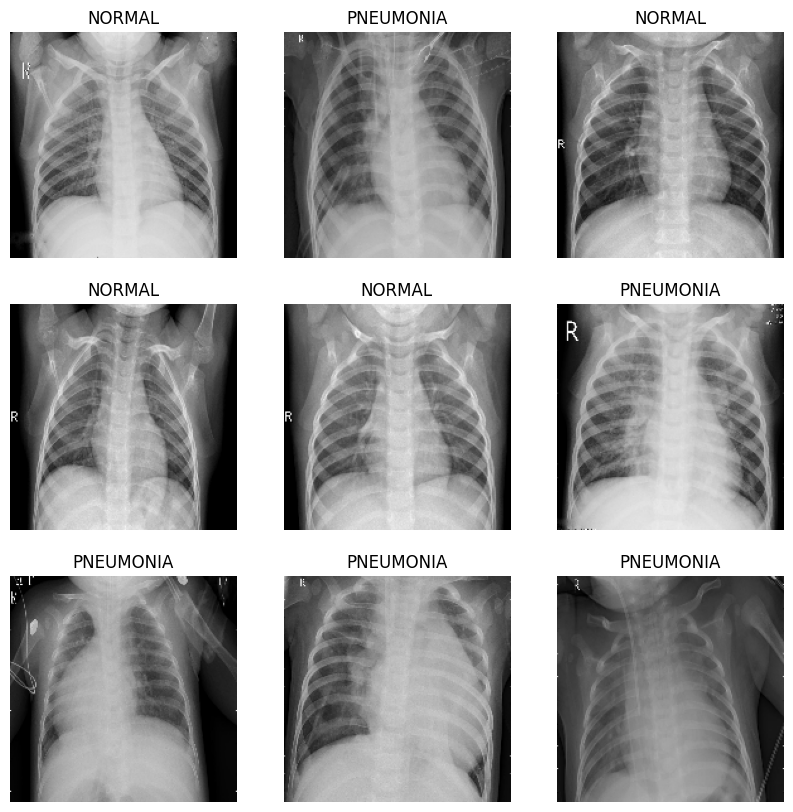

In [3]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [4]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1. / 255)

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = tf.keras.Sequential([
  normalization_layer,
  tf.keras.layers.Conv2D(8, (3, 3), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2),
  tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2),
  tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2),
  tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2),
  tf.keras.layers.Conv2D(128, (3, 3), padding='same',  activation='relu'),
  tf.keras.layers.AveragePooling2D(2),
  tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
  tf.keras.layers.AveragePooling2D(4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

### Model Compilation and Training

In [7]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_ds, validation_data=validation_ds, epochs=7)


Epoch 1/7



C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



163/163 [==============================] - 37s 106ms/step - loss: 0.9221 - accuracy: 0.2571 - val_loss: 0.7261 - val_accuracy: 0.5000
Epoch 2/7
163/163 [==============================] - 16s 99ms/step - loss: 0.7638 - accuracy: 0.2571 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 3/7
163/163 [==============================] - 16s 99ms/step - loss: 0.6850 - accuracy: 0.5719 - val_loss: 0.6958 - val_accuracy: 0.5000
Epoch 4/7
163/163 [==============================] - 17s 104ms/step - loss: 0.6380 - accuracy: 0.7429 - val_loss: 0.7093 - val_accuracy: 0.5000
Epoch 5/7
163/163 [==============================] - 17s 107ms/step - loss: 0.6088 - accuracy: 0.7429 - val_loss: 0.7281 - val_accuracy: 0.5000
Epoch 6/7
163/163 [==============================] - 17s 102ms/step - loss: 0.5913 - accuracy: 0.7429 - val_loss: 0.7490 - val_accuracy: 0.5000
Epoch 7/7
163/163 [==============================] - 19s 119ms/step - loss: 0.5813 - accuracy: 0.7429 - val_loss: 0.7673 - val_accuracy: 0.5000


### Model Evaluation

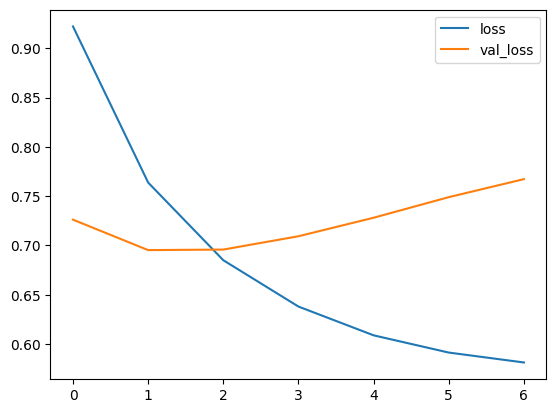

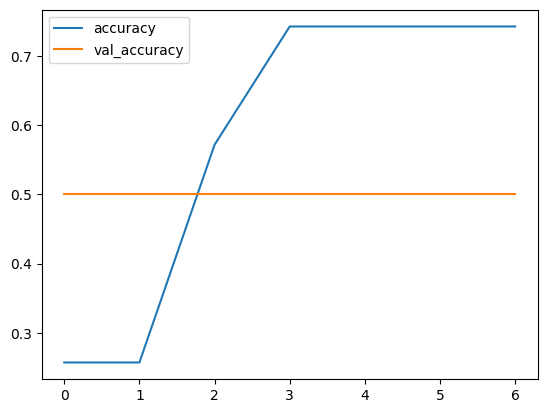

Final training accuracy: 74.29064512252808
Final validation accuracy: 50.0
20/20 [==============================] - 3s 87ms/step - loss: 0.6698 - accuracy: 0.6250
The accuracy of the model on test dataset is 62.0


In [8]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()
print("Final training accuracy: {}".format(history.history['accuracy'][-1]*100 ))
print("Final validation accuracy: {}".format(history.history['val_accuracy'][-1] *100 ))
loss, accuracy = model.evaluate(test_ds)
print('The accuracy of the model on test dataset is', np.round(accuracy*100))

### Prediction

1/1 [==============================] - 0s 279ms/step
[0.6855925]
The image classified is Pneumonia


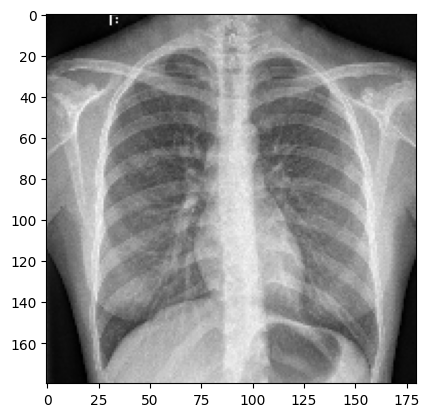

In [9]:
test_img = tf.keras.utils.load_img('pneumonia/test/NORMAL/IM-0013-0001.jpeg', target_size=(180, 180))
plt.imshow(test_img)

test_img = tf.keras.utils.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
result = model.predict(test_img)
probability = result[0]
print(probability)
if probability[0] > 0.5:
    print("The image classified is Pneumonia")
else:
    print("The image classified is Normal")


Here the model shows wrong output.It predicted Pneumonia where the person was normal.

1/1 [==============================] - 0s 36ms/step
[0.6855913]
The image classified is Pneumonia


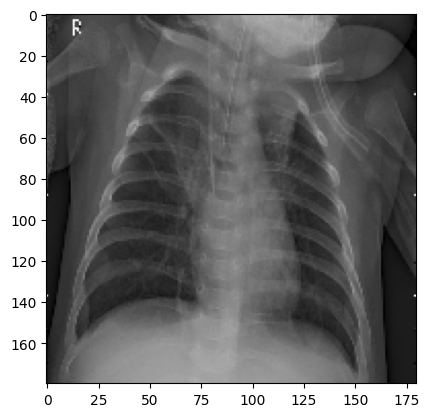

In [10]:
test_img = tf.keras.utils.load_img('pneumonia/test/PNEUMONIA/person8_virus_28.jpeg', target_size=(180, 180))
plt.imshow(test_img)

test_img = tf.keras.utils.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
result = model.predict(test_img)
probability = result[0]
print(probability)
if probability[0] > 0.5:
    print("The image classified is Pneumonia")
else:
    print("The image classified is Normal")


1/1 [==============================] - 0s 61ms/step
[0.68559074]
The image classified is Pneumonia


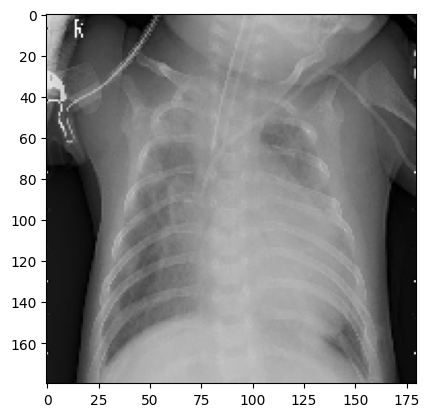

In [14]:
test_img = tf.keras.utils.load_img('pneumonia/test/PNEUMONIA/person1_virus_6.jpeg', target_size=(180, 180))
plt.imshow(test_img)

test_img = tf.keras.utils.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
result = model.predict(test_img)
probability = result[0]
print(probability)
if probability[0] > 0.5:
    print("The image classified is Pneumonia")
else:
    print("The image classified is Normal")


The model predicts wrong in some case. Accuracy is not good overall. Unbalanced dataset may be a reason. Better result can be achieved if the dataset had equal number of normal and pneumonia images.